In [1]:
#Carga de librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cufflinks as cf
from IPython.display import display,HTML

In [3]:
#Carga de archivo CSV
data= pd.read_csv("CountryTable.csv")
data

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Willem-Alexander,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,Jose Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the uK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqiperia,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YuG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,NaN,Jugoslavija,Federal Republic,Vojislav KoStunica,1792.0,Yu
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [5]:
#Identificación de valores nulos
null=data.isnull(). sum()
null

code                  0
name                  0
continent             0
region                0
surface_area          0
independence_year    47
population            0
life_expectancy      17
gnp                   0
gnp_old              61
local_name            1
government_form       0
head_of_state         3
capital               7
code2                 1
dtype: int64

3. Aplicar los siguientes métodos para reemplazar valores nulos en cada columna:

In [10]:
#“independence_year”: Rellenar con el valor “1900”
data["independence_year"]= data["independence_year"].fillna(1900)

#“life_expectancy”: Rellenar con el valor “Media” de la columna
data["life_expectancy"]=data["life_expectancy"].fillna(round(data["life_expectancy"].mean(),1))

#“gnp_old ”: Rellenar con el valor “Mediana” de la columna
data["gnp_old"]=data["gnp_old"].fillna(round(data["gnp_old"].median(),1))

#“local_name”: Rellenar con el string “Inexistente”
data["local_name"]=data["local_name"].fillna("Inexistente")

#“head_of_state”: Rellenar con el string “Desconocido”
data["head_of_state"]=data["head_of_state"].fillna("Desconocido")

#“capital ”: Rellenar con el valor “0”
data["capital"]=data["capital"].fillna(0)

#“code2”: Rellenar con el string “NA”
data["code2"]=data["code2"].fillna("NA")

In [8]:
#Identificación de valores nulos
null=data.isnull(). sum()
null

code                 0
name                 0
continent            0
region               0
surface_area         0
independence_year    0
population           0
life_expectancy      0
gnp                  0
gnp_old              0
local_name           0
government_form      0
head_of_state        0
capital              0
code2                0
dtype: int64

4. Aplicar método de distribución normal para identificar Outliers, tomando como limites 2 desviaciones estándar, exclusivamente para las columnas “gnp old” y “population”, obtener los diagramas de caja de cada una respectivamente.


In [11]:
#Creación de una copia para la base de datos
copia = data.copy()

GNP OLD

In [13]:
reto2=copia["gnp_old"]
limitesuperior=reto2.mean()+2*reto2.std()
limiteinferior=reto2.mean()-2*reto2.std()
print("Limite superior permitido", limitesuperior)
print("Limite inferior permitido",limiteinferior)

Limite superior permitido 1375629.5313349972
Limite inferior permitido -1124761.0041383444


In [14]:
#Identificación de Outliers
outliers= copia [(reto2>limitesuperior) | (reto2<limiteinferior)]
outliers

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
56,DEu,Germany,Europe,Western Europe,357022.0,1955.0,82164700,77.4,2133367.0,2102826.0,Deutschland,Federal Republic,Johannes Rau,3068.0,DE
72,FRA,France,Europe,Western Europe,551500.0,843.0,59225700,78.8,1424285.0,1392448.0,France,Republic,Jacques Chirac,2974.0,FR
109,JPN,Japan,Asia,Eastern Asia,377829.0,-660.0,126714000,80.7,3787042.0,4192638.0,Nihon/Nippon,Constitutional Monarchy,Akihito,1532.0,JP
223,uSA,united States,North America,North America,9363520.0,1776.0,278357000,77.1,8510700.0,8110900.0,united States,Federal Republic,George W. Bush,3813.0,uS


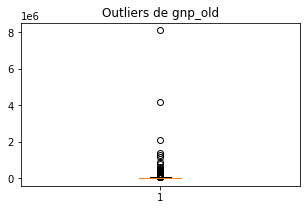

In [15]:
#Diagrama de caja: gnp_old.
fig1 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["gnp_old"]) 
plt.title("Outliers de gnp_old")
plt.show() #diagrama para visualizar outliers

In [20]:
#Valores extremos: límite superior y límite inferior.
#Variable: population.
x2=copia["population"]
limiteSuperior2= x2.mean() + 2*x2.std()
limiteInferior2= x2.mean() - 2*x2.std()
print("Limite superior permitido", limiteSuperior2)
print("Limite inferior permitido", limiteInferior2)

Limite superior permitido 244113732.5648982
Limite inferior permitido -193245536.33058858


In [21]:
#Identificación de Outliers
outliers_population= copia [(x2>limiteSuperior2) | (x2<limiteInferior2)]
outliers_population

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
41,CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1277558000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
99,IND,India,Asia,Southern and Central Asia,3287263.0,1947.0,1013662000,62.5,447114.0,430572.0,Bharat/India,Federal Republic,Kocheril Raman Narayanan,1109.0,IN
223,uSA,united States,North America,North America,9363520.0,1776.0,278357000,77.1,8510700.0,8110900.0,united States,Federal Republic,George W. Bush,3813.0,uS


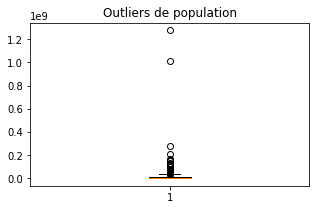

In [22]:
#Diagrama de caja: population.
fig2 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["population"]) 
plt.title("Outliers de population")
plt.show() #diagrama para visualizar outliers

5. Aplicar método de rango intercuartílico para identificar Outliers, tomando como limites 1.3 iqr, exclusivamente para las columnas “gnp old”, “surface área”, “life expectancy” y “population”, obtener los diagramas de caja de cada una respectivamente.


In [24]:
#Variable: gnp_old.

x3=copia["gnp_old"]

p25x3=x3.quantile(0.25) #Q1
p75x3=x3.quantile(0.75) #Q3
iqrx3 = p75x3 - p25x3 #Q3-Q1

LimiteSuperior3 = p75x3 + 1.3*iqrx3
LimiteInferior3 = p25x3 - 1.3*iqrx3
print("Limite superior permitido", LimiteSuperior3)
print("Limite inferior permitido", LimiteInferior3)

Limite superior permitido 67186.0
Limite inferior permitido -32552.0


In [27]:
#Identificación de Outliers
otlrs_gnp_old_iqr= copia [(x3>LimiteSuperior3) | (x3<LimiteInferior3)]
otlrs_gnp_old_iqr

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
8,ARG,Argentina,South America,South America,2780400.0,1816.0,37032000,75.1,340238.0,323310.0,Argentina,Federal Republic,Fernando de la Rua,69.0,AR
14,AuS,Australia,Oceania,Australia and New Zealand,7741220.0,1901.0,18886000,79.8,351182.0,392911.0,Australia,"Constitutional Monarchy, Federation",Elisabeth II,135.0,Au
15,AuT,Austria,Europe,Western Europe,83859.0,1918.0,8091800,77.7,211860.0,206025.0,osterreich,Federal Republic,Thomas Klestil,1523.0,AT
18,BEL,Belgium,Europe,Western Europe,30518.0,1830.0,10239000,77.8,249704.0,243948.0,Belgie/Belgique,"Constitutional Monarchy, Federation",Albert II,179.0,BE
30,BRA,Brazil,South America,South America,8547403.0,1822.0,170115000,62.9,776739.0,804108.0,Brasil,Federal Republic,Fernando Henrique Cardoso,211.0,BR
37,CAN,Canada,North America,North America,9970610.0,1867.0,31147000,79.4,598862.0,625626.0,Canada,"Constitutional Monarchy, Federation",Elisabeth II,1822.0,CA
39,CHE,Switzerland,Europe,Western Europe,41284.0,1499.0,7160400,79.6,264478.0,256092.0,Schweiz/Suisse/Svizzera/Svizra,Federation,Adolf Ogi,3248.0,CH
40,CHL,Chile,South America,South America,756626.0,1810.0,15211000,75.7,72949.0,75780.0,Chile,Republic,Ricardo Lagos Escobar,554.0,CL
41,CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1277558000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
47,COL,Colombia,South America,South America,1138914.0,1810.0,42321000,70.3,102896.0,105116.0,Colombia,Republic,Andres Pastrana Arango,2257.0,CO


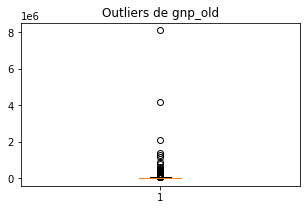

In [28]:
#Diagrama de caja: gnp_old.
fig3 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["gnp_old"]) 
plt.title("Outliers de gnp_old")
plt.show() #diagrama para visualizar outliers

In [35]:
#Variable: surface_area.

x4=copia["surface_area"]

p25x4=x4.quantile(0.25) #Q1
p75x4=x4.quantile(0.75) #Q3
iqrx4 = p75x4 - p25x4 

LimiteSuperior4 = p75x4 + 1.3*iqrx4
LimiteInferior4 = p25x4 - 1.3*iqrx4
print("Limite superior permitido", LimiteSuperior4)
print("Limite inferior permitido", LimiteInferior4)

Limite superior permitido 914177.8500000001
Limite inferior permitido -513148.35000000003


In [36]:
#Identificación de Outliers
otlrs_sfc_area_iqr= copia [(x4>LimiteSuperior4) | (x4<LimiteInferior4)]
otlrs_sfc_area_iqr

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,Jose Eduardo dos Santos,56.0,AO
8,ARG,Argentina,South America,South America,2780400.0,1816.0,37032000,75.1,340238.0,323310.0,Argentina,Federal Republic,Fernando de la Rua,69.0,AR
11,ATA,Antarctica,Antarctica,Antarctica,13120000.0,1900.0,0,66.5,0.0,8421.0,Inexistente,Co-administrated,Desconocido,0.0,AQ
14,AuS,Australia,Oceania,Australia and New Zealand,7741220.0,1901.0,18886000,79.8,351182.0,392911.0,Australia,"Constitutional Monarchy, Federation",Elisabeth II,135.0,Au
29,BOL,Bolivia,South America,South America,1098581.0,1825.0,8329000,63.7,8571.0,7967.0,Bolivia,Republic,Hugo Banzer Suarez,194.0,BO
30,BRA,Brazil,South America,South America,8547403.0,1822.0,170115000,62.9,776739.0,804108.0,Brasil,Federal Republic,Fernando Henrique Cardoso,211.0,BR
37,CAN,Canada,North America,North America,9970610.0,1867.0,31147000,79.4,598862.0,625626.0,Canada,"Constitutional Monarchy, Federation",Elisabeth II,1822.0,CA
41,CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1277558000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
44,COD,"Congo, The Democratic Republic of the",Africa,Central Africa,2344858.0,1960.0,51654000,48.8,6964.0,2474.0,Republique Democratique du Congo,Republic,Joseph Kabila,2298.0,CD
47,COL,Colombia,South America,South America,1138914.0,1810.0,42321000,70.3,102896.0,105116.0,Colombia,Republic,Andres Pastrana Arango,2257.0,CO


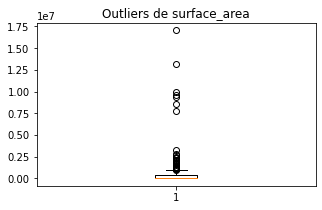

In [37]:
#Diagrama de caja: surface_area
fig4 = plt.figure(figsize =(5, 3))
plt.boxplot(data["surface_area"]) 
plt.title("Outliers de surface_area")
plt.show() #diagrama para visualizar outliers

In [38]:
#Variable: life_expectancy.

x5=copia["life_expectancy"]

p25x5=x5.quantile(0.25) #Q1
p75x5=x5.quantile(0.75) #Q3
iqrx5 = p75x5 - p25x5 

LimiteSuperior5 = p75x5 + 1.3*iqrx5
LimiteInferior5 = p25x5 - 1.3*iqrx5
print("Limite superior permitido", LimiteSuperior5)
print("Limite inferior permitido", LimiteInferior5)

Limite superior permitido 92.7
Limite inferior permitido 44.10000000000001


In [41]:
#Identificación de Outliers
otlrs_life_exptcy_iqr= copia [(x5>LimiteSuperior5) | (x5<LimiteInferior5)]
otlrs_life_exptcy_iqr

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,Jose Eduardo dos Santos,56.0,AO
35,BWA,Botswana,Africa,Southern Africa,581730.0,1966.0,1622000,39.3,4834.0,4935.0,Botswana,Republic,Festus G. Mogae,204.0,BW
36,CAF,Central African Republic,Africa,Central Africa,622984.0,1960.0,3615000,44.0,1054.0,993.0,Centrafrique/Be-Afrika,Republic,Ange-Felix Patasse,1889.0,CF
143,MOZ,Mozambique,Africa,Eastern Africa,801590.0,1975.0,19680000,37.5,2891.0,2711.0,Mocambique,Republic,JoaquIm A. Chissano,2698.0,MZ
148,MWI,Malawi,Africa,Eastern Africa,118484.0,1964.0,10925000,37.6,1687.0,2527.0,Malawi,Republic,Bakili Muluzi,2462.0,MW
151,NAM,Namibia,Africa,Southern Africa,824292.0,1990.0,1726000,42.5,3101.0,3384.0,Namibia,Republic,Sam Nujoma,2726.0,NA
153,NER,Niger,Africa,Western Africa,1267000.0,1960.0,10730000,41.3,1706.0,1580.0,Niger,Republic,Mamadou Tandja,2738.0,NE
182,RWA,Rwanda,Africa,Eastern Africa,26338.0,1962.0,7733000,39.3,2036.0,1863.0,Rwanda/urwanda,Republic,Paul Kagame,3047.0,RW
201,SWZ,Swaziland,Africa,Southern Africa,17364.0,1968.0,1008000,40.4,1206.0,1312.0,kaNgwane,Monarchy,Mswati III,3244.0,SZ
219,uGA,uganda,Africa,Eastern Africa,241038.0,1962.0,21778000,42.9,6313.0,6887.0,uganda,Republic,Yoweri Museveni,3425.0,uG


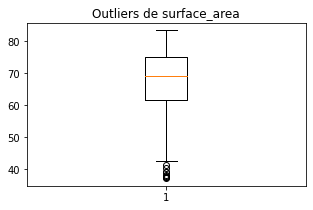

In [43]:
#Diagrama de caja: life_expectancy
fig5 = plt.figure(figsize =(5, 3))
plt.boxplot(data["life_expectancy"]) 
plt.title("Outliers de life_expectancy")
plt.show() 

In [44]:
#Variable: population.

x6=copia["population"]

p25x6=x6.quantile(0.25) #Q1
p75x6=x6.quantile(0.75) #Q3
iqrx6 = p75x6 - p25x6 

LimiteSuperior6 = p75x6 + 1.3*iqrx6
LimiteInferior6 = p25x6 - 1.3*iqrx6
print("Limite superior permitido", LimiteSuperior6)
print("Limite inferior permitido", LimiteInferior6)

Limite superior permitido 34042250.0
Limite inferior permitido -18868750.0


In [45]:
#Identificación de Outliers
otlrs_population_iqr= copia [(x6>LimiteSuperior6) | (x6<LimiteInferior6)]
otlrs_population_iqr

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
8,ARG,Argentina,South America,South America,2780400.0,1816.0,37032000,75.1,340238.0,323310.0,Argentina,Federal Republic,Fernando de la Rua,69.0,AR
21,BGD,Bangladesh,Asia,Southern and Central Asia,143998.0,1971.0,129155000,60.2,32852.0,31966.0,Bangladesh,Republic,Shahabuddin Ahmad,150.0,BD
30,BRA,Brazil,South America,South America,8547403.0,1822.0,170115000,62.9,776739.0,804108.0,Brasil,Federal Republic,Fernando Henrique Cardoso,211.0,BR
41,CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1277558000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
44,COD,"Congo, The Democratic Republic of the",Africa,Central Africa,2344858.0,1960.0,51654000,48.8,6964.0,2474.0,Republique Democratique du Congo,Republic,Joseph Kabila,2298.0,CD
47,COL,Colombia,South America,South America,1138914.0,1810.0,42321000,70.3,102896.0,105116.0,Colombia,Republic,Andres Pastrana Arango,2257.0,CO
56,DEu,Germany,Europe,Western Europe,357022.0,1955.0,82164700,77.4,2133367.0,2102826.0,Deutschland,Federal Republic,Johannes Rau,3068.0,DE
63,EGY,Egypt,Africa,Northern Africa,1001449.0,1922.0,68470000,63.3,82710.0,75617.0,Misr,Republic,Hosni Mubarak,608.0,EG
66,ESP,Spain,Europe,Southern Europe,505992.0,1492.0,39441700,78.8,553233.0,532031.0,Espana,Constitutional Monarchy,Juan Carlos I,653.0,ES
68,ETH,Ethiopia,Africa,Eastern Africa,1104300.0,-1000.0,62565000,45.2,6353.0,6180.0,YeItyop iya,Republic,Negasso Gidada,756.0,ET


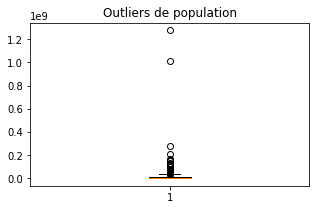

In [46]:
#Diagrama de caja: population
fig6 = plt.figure(figsize =(5, 3))
plt.boxplot(data["population"]) 
plt.title("Outliers de population")
plt.show() 